# Aggregating & Describing categories in Financial Data 

## Work By - **RAVJOT SINGH**

E-Mail - ravjot313@gmail.com

Website - https://ravjot03.github.io/

LinkedIn - https://www.linkedin.com/in/ravjot03/

GitHub - https://github.com/Ravjot03

Medium - https://medium.com/@ravjot03

## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
nasdaq = pd.read_excel('listings.xlsx', sheet_name = 'nasdaq', na_values='n/a')

In [3]:
nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3167 non-null   object 
 1   Company Name           3167 non-null   object 
 2   Last Sale              3165 non-null   float64
 3   Market Capitalization  3167 non-null   float64
 4   IPO Year               1386 non-null   float64
 5   Sector                 2767 non-null   object 
 6   Industry               2767 non-null   object 
dtypes: float64(3), object(4)
memory usage: 173.3+ KB


Converting `Market Capitalization` column into Million Dollar units.

In [4]:
nasdaq['Market Capitalization'] = nasdaq['Market Capitalization'].div(1e6)

Grouping the data by calling the `pandas` `groupby` method, which creates a new object. This method expects to pass a column label for a categorical column.

Assigned the grouped data to the variable `nasdaq_by_sector`.

##Part-1

## Group by one variable and aggregate

## Grouping data

In [5]:
nasdaq_by_sector = nasdaq.groupby('Sector') #Creating a groupby object

Iterating over this new object in a loop. In each iteration, the object returns two items, just like a dictionary: 

First, a key that corresponds to the category represented by this group of data.

Second, a DataFrame containing the information for this group. 

Now, just selecting the `Market Capitalization` column of the returned DataFrame, and applying an aggregation like the `mean` to it. 

### Using a for loop

In [6]:
for sector, data in nasdaq_by_sector:
  print(sector, data['Market Capitalization'].mean())

Basic Industries 724.8999338580088
Capital Goods 1511.2373727809975
Consumer Durables 839.8026066270018
Consumer Non-Durables 3104.0512055241334
Consumer Services 5582.344174819412
Energy 826.607607854727
Finance 1044.0902047996321
Health Care 1758.709196756265
Miscellaneous 3445.655934557965
Public Utilities 2357.8653150733353
Technology 10883.43421354678
Transportation 2869.660006726413


The code returns both the name of the category, and the average market cap in million dollars for each category.

### Skipping the loop

Pandas actually makes it easier to aggregate by categories. Instead of using a `for loop`, we can just select any numerical column from the grouped data, and apply an aggregate statistic.

We are again using the `mean` to aggregate the market cap in millions per sector on the NASDAQ. 

Pandas returns a series with the category names as row labels, and the aggregate statistics as values.

In [7]:
mcap_by_sector = nasdaq_by_sector['Market Capitalization'].mean().sort_values(ascending=False)
mcap_by_sector

Sector
Technology               10883.434214
Consumer Services         5582.344175
Miscellaneous             3445.655935
Consumer Non-Durables     3104.051206
Transportation            2869.660007
Public Utilities          2357.865315
Health Care               1758.709197
Capital Goods             1511.237373
Finance                   1044.090205
Consumer Durables          839.802607
Energy                     826.607608
Basic Industries           724.899934
Name: Market Capitalization, dtype: float64

## Visualizing data

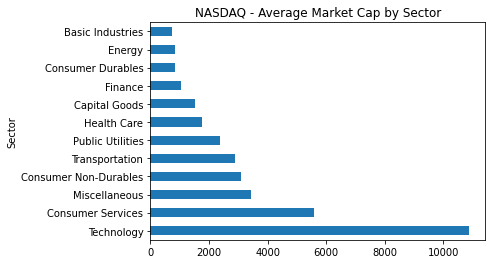

In [8]:
title = 'NASDAQ - Average Market Cap by Sector'  #title of the plot

mcap_by_sector.plot(kind='barh', title=title) #kind='barh' for horizontal bar chart
plt.show()

## Aggregating summary

Aggregating summary for all numeric columns

In [9]:
nasdaq_by_sector.mean()

,Last Sale,Market Capitalization,IPO Year
Sector,,,
Basic Industries,21.597679,724.899934,2000.766667
Capital Goods,26.188681,1511.237373,2001.324675
Consumer Durables,24.363391,839.802607,2003.222222
Consumer Non-Durables,25.749565,3104.051206,2000.609756
Consumer Services,34.917318,5582.344175,2004.104575
Energy,15.496834,826.607608,2008.034483
Finance,29.644242,1044.090205,2010.321101
Health Care,19.462531,1758.709197,2009.240409
Miscellaneous,46.094369,3445.655935,2004.333333


## Part-2

##  *  Group by two or more variables
##  *  Applying multiple aggregations

## Applying multiple aggregations

The `agg` method allows to pass a list with names of statistical metrics. Pandas will then calculate each of these metrics for the selected column.

In [10]:
nasdaq_by_sector['Market Capitalization'].agg(['size', 'mean']).sort_values('size')

,size,mean
Sector,,
Transportation,52,2869.660007
Energy,66,826.607608
Public Utilities,66,2357.865315
Basic Industries,78,724.899934
Consumer Durables,88,839.802607
Miscellaneous,89,3445.655935
Consumer Non-Durables,103,3104.051206
Capital Goods,172,1511.237373
Consumer Services,348,5582.344175


The resulting DataFrame have the categories as row labels, and the metrics as columns with appropriate labels.

### Adding new labels
We renamed the `Market cap` column containing the count to `'number of observations'` instead of `size`, and the column containing the `mean` to `'average'`.

In [11]:
nasdaq_by_sector['Market Capitalization'].agg(Observations= 'size', Average= 'mean')

,Observations,Average
Sector,,
Basic Industries,78,724.899934
Capital Goods,172,1511.237373
Consumer Durables,88,839.802607
Consumer Non-Durables,103,3104.051206
Consumer Services,348,5582.344175
Energy,66,826.607608
Finance,627,1044.090205
Health Care,645,1758.709197
Miscellaneous,89,3445.655935


### Different statistics by column
The `agg` method allows yet another way to aggregate the grouped data. If we call this method on the grouped data before selecting a column, we can pass a dictionary to select both columns and methods. 

Create a dictionary, and select as keys one or more numeric columns. 

As we have done, we are using the `market cap` and the `IPO Year`. Then, select as values of the dictionary the statistical methods that would like to calculate for these columns.

In [12]:
nasdaq_by_sector.agg({'Market Capitalization': 'size', 'IPO Year':'median'})

,Market Capitalization,IPO Year
Sector,,
Basic Industries,78,1996.5
Capital Goods,172,2000.0
Consumer Durables,88,2002.5
Consumer Non-Durables,103,1998.0
Consumer Services,348,2005.0
Energy,66,2011.0
Finance,627,2014.0
Health Care,645,2014.0
Miscellaneous,89,2005.0


## Aggregating by 2 categories

Let's now aggregate by two or more categories at the same time. Instead of passing a single column to the `groupby` method, create a list with several column labels. And Pandas will group the data accordingly.

In [13]:
nasdaq_by_sector_year = nasdaq.groupby(['Sector', 'IPO Year'])
nasdaq_by_sector_year['Market Capitalization'].agg('mean')

Sector            IPO Year
Basic Industries  1972.0       877.240005
                  1973.0      1445.697371
                  1986.0      1396.817381
                  1988.0        24.847526
                  1990.0       434.808483
                                 ...     
Transportation    2006.0      1397.129447
                  2007.0       413.900806
                  2009.0       552.445919
                  2011.0      3711.638317
                  2013.0       125.740421
Name: Market Capitalization, Length: 280, dtype: float64

### Selecting from MultiIndex

In [14]:
mcap_sector_year = nasdaq_by_sector_year['Market Capitalization'].agg('mean')
mcap_sector_year

Sector            IPO Year
Basic Industries  1972.0       877.240005
                  1973.0      1445.697371
                  1986.0      1396.817381
                  1988.0        24.847526
                  1990.0       434.808483
                                 ...     
Transportation    2006.0      1397.129447
                  2007.0       413.900806
                  2009.0       552.445919
                  2011.0      3711.638317
                  2013.0       125.740421
Name: Market Capitalization, Length: 280, dtype: float64

Let’s take a look at how we can select values from this DataFrame with MultiIndex: Use the selector `loc` to select from a MultiIndex. If we select a single label from the first index level using `loc`, then pandas returns a Series with a single index that only contains values from the second level of the MultiIndex.

In [15]:
mcap_sector_year.loc['Basic Industries']

IPO Year
1972.0     877.240005
1973.0    1445.697371
1986.0    1396.817381
1988.0      24.847526
1990.0     434.808483
1991.0       9.338401
1992.0     160.416661
1993.0    1933.224036
1994.0     163.267514
1995.0     125.342784
1996.0    4087.508427
1997.0      20.754774
2008.0     331.370813
2010.0     120.296167
2011.0      35.498729
2012.0     381.796074
2013.0      22.661533
2015.0     260.075564
2016.0      81.288336
Name: Market Capitalization, dtype: float64

We can also select several categories from the first level of the MultiIndex. Just pass a list with labels from the first index level, and pandas will return a series with MultiIndex just containing the selected subset of categories. 

For example, we have selected `Basic Industries` and `Transportation` to just show the average market cap per IPO year for these two sectors.

In [16]:
mcap_sector_year.loc[['Basic Industries', 'Transportation']]

Sector            IPO Year
Basic Industries  1972.0       877.240005
                  1973.0      1445.697371
                  1986.0      1396.817381
                  1988.0        24.847526
                  1990.0       434.808483
                  1991.0         9.338401
                  1992.0       160.416661
                  1993.0      1933.224036
                  1994.0       163.267514
                  1995.0       125.342784
                  1996.0      4087.508427
                  1997.0        20.754774
                  2008.0       331.370813
                  2010.0       120.296167
                  2011.0        35.498729
                  2012.0       381.796074
                  2013.0        22.661533
                  2015.0       260.075564
                  2016.0        81.288336
Transportation    1986.0      1176.179710
                  1991.0      6646.778622
                  1992.0        56.074572
                  1993.0      3474.796885
       

## Part-3

## Summary statistics with seaborn

## Importing Seaborn library

In [17]:
import seaborn as sns

### Countplot

The most basic plot is the `countplot`, which visualizes the number of observations per category. 

Countplot just displays the number of observations for each category, similar to when we used groupby with size.

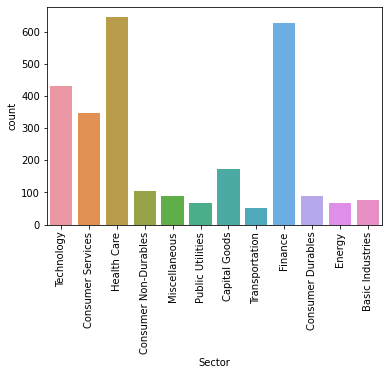

In [18]:
sns.countplot(x='Sector', data=nasdaq)
plt.xticks(rotation=90)
plt.show()

### Sorted Countplot

To create a sorted countplot, first we have to create a list of the sorted category labels.

Just grouping NASDAQ Data by sector, and calculating the size for each group, and sorting the result in descending order. 

In [19]:
sector_size = nasdaq.groupby('Sector').size()
order =  sector_size.sort_values(ascending=False)
order

Sector
Health Care              645
Finance                  627
Technology               433
Consumer Services        348
Capital Goods            172
Consumer Non-Durables    103
Miscellaneous             89
Consumer Durables         88
Basic Industries          78
Public Utilities          66
Energy                    66
Transportation            52
dtype: int64

As we can see, we got the sorted count of observations by category. To extract the index as a list, just call `.index.tolist` on the series.

In [20]:
order = order.index.tolist()
order

['Health Care',
 'Finance',
 'Technology',
 'Consumer Services',
 'Capital Goods',
 'Consumer Non-Durables',
 'Miscellaneous',
 'Consumer Durables',
 'Basic Industries',
 'Public Utilities',
 'Energy',
 'Transportation']

Passing the list to countplot's parameter 'order', and countplot now displays in sorted order.

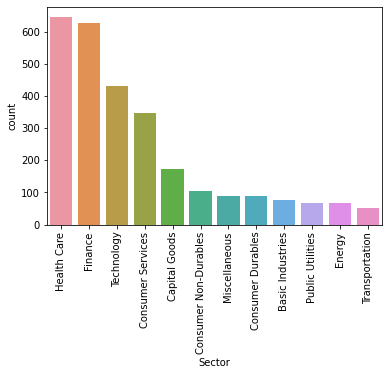

In [21]:
sns.countplot(x='Sector', data=nasdaq, order=order)
plt.xticks(rotation=90)
plt.show()

### Countplot Multiple categories

Filtering companies with IPO after 2014

In [22]:
recent_ipo = nasdaq[nasdaq['IPO Year'] > 2014]
recent_ipo

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
193,TEAM,Atlassian Corporation Plc,31.2300,6947.660650,2015.0,Technology,Computer Software: Prepackaged Software
254,MSG,MSG Networks Inc.,197.0800,4722.561033,2015.0,Consumer Services,Services-Misc. Amusement & Recreation
264,CDEV,"Centennial Resource Development, Inc.",19.7900,4520.552440,2016.0,Energy,Oil & Gas Production
265,BUFF,"Blue Buffalo Pet Products, Inc.",22.8500,4491.159297,2015.0,Consumer Non-Durables,Packaged Foods
268,MTCH,"Match Group, Inc.",17.2200,4407.779654,2015.0,Technology,"Computer Software: Programming, Data Processing"
...,...,...,...,...,...,...,...
3119,SRTSW,"Sensus Healthcare, Inc.",0.6012,0.000000,2016.0,Health Care,Medical/Dental Instruments
3122,SRUNU,Silver Run Acquisition Corporation II,10.3900,0.000000,2017.0,Finance,Business Services
3129,STLRU,Stellar Acquisition III Inc.,10.4200,0.000000,2016.0,Finance,Business Services
3130,STLRW,Stellar Acquisition III Inc.,0.3600,0.000000,2016.0,Finance,Business Services


Converting the variable year to integer dtype

In [23]:
recent_ipo['IPO Year'] = recent_ipo['IPO Year'].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Passing the column `IPO year` to the countplot's `hue` parameter.

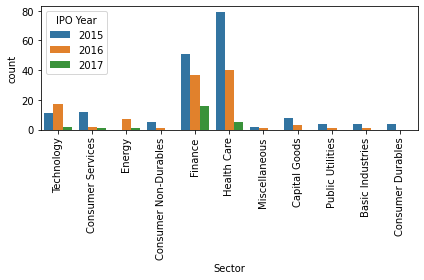

In [24]:
sns.countplot(x='Sector', hue='IPO Year', data=recent_ipo)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Seaborn now produces a grouped bar chart that shows the number of observations for each sector and IPO year.

### PointPlot

The Pointplot is a useful tool to compare statistics for more than one categorical variable.

Let's first create a new variable called `IPO` that indicates whether the `IPO` occurred before or after the year 2000. 

We then add this variable to the pointplot to differentiate the average market cap by sector by this second category.

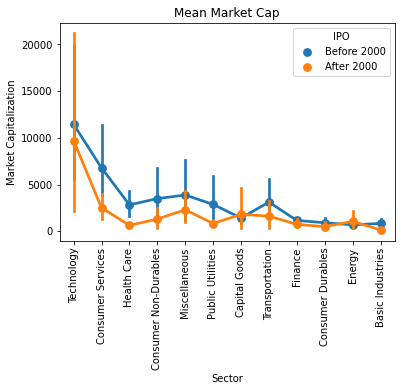

In [25]:
nasdaq['IPO'] = nasdaq['IPO Year'].apply(lambda x: 'After 2000' if x > 2000 else 'Before 2000')
sns.pointplot(x='Sector', y='Market Capitalization', hue='IPO', data=nasdaq)
plt.xticks(rotation=90)
plt.title('Mean Market Cap')
plt.show()

As expected, for most sectors, market capitalization is higher for older companies, but this is not true for all cases.

##Part-4

## Category distributions with Seaborn

###Cleaning Data: removing outliers

To get a better view of the distribution of our data, let's remove inactive companies with market cap of 0, and outliers with very large market capitalization. We could choose the 90th percentile as a cutoff for outliers at the high end.

In [26]:
nasdaq = nasdaq[nasdaq['Market Capitalization'] > 0]
print('Shape of Original Dataset : ',nasdaq.shape)

outliers = nasdaq['Market Capitalization'].quantile(0.9)  #Cutoff for outliers

nasdaq = nasdaq[nasdaq['Market Capitalization'] < outliers]
print('Updated shape of nasdaq:', nasdaq.shape)


Shape of Original Dataset :  (2899, 8)
Updated shape of nasdaq: (2609, 8)


### Boxplot

The box plot is a classic statistical chart based on key quantiles of a distribution. The box plot requires to provide a DataFrame, and: The label of one categorical column for the x axis, and The label of one quantitative column for display on the y-axis.

After providing the data, the boxplot outlines the distribution of the numeric variable market cap for each level of the categorical variable Sector as follows: The box starts at the 1st and ends at the 3rd quartile. The horizontal bar at the center of the box is the second quartile, ie, the median. The interquartile range is the difference between the 3rd and the 1st quartile, represented by the vertical length of the box The two whiskers extending from the top and bottom are one and a half times the interquartile range in length (but limited by 0 at the lower end). Data points outside this range are marked as outliers.

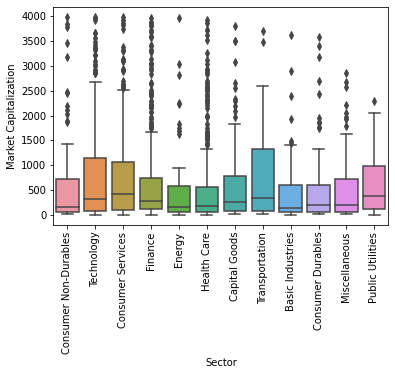

In [27]:
sns.boxplot(x='Sector', y='Market Capitalization', data=nasdaq)
plt.xticks(rotation=90)
plt.show()

We can see that the company sizes vary significantly at the top end for each sector. While the median is similar for each sector, the third quartile, inter quartile range, and number of outliers differ greatly.

### Swarmplot

A useful variation is the swarmplot. It displays all observations, while attempting to avoid overlap. It is most useful when the number of observations is limited.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 48.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 64.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 58.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 75.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 44.1% of the points cannot be placed; y

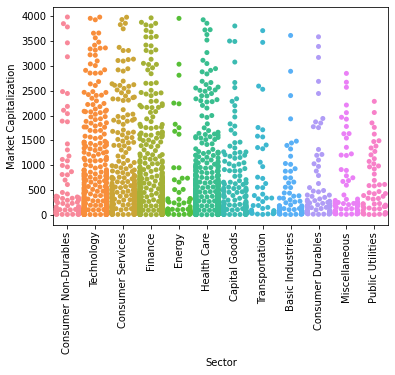

In [28]:
sns.swarmplot(x='Sector', y='Market Capitalization', data=nasdaq)
plt.xticks(rotation=90)
plt.show()

##Conclusion :

In this jupyter notebook, we have learnt how to group data by one or more categorical variables, and to calculate and visualize summary statistics for each caategory.